# Module 09: *k*-Nearest Neighbors

## Overview
The k-Nearest neighbor method is a type of instance based learning that uses existing data, with known labels, to predict the label for a new observation. The purpose of this exercise is to demonstrate the use of k-NN for classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


## Instructions

#### Use the notebook: `k-NN.ipynb` to perform the following :
Question 1. Perform the k-nn analysis using different values of k. Recommend which value is more appropriate and justify your response.

Question 2. Evaluate the prediction accuracy, using the best value of k.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

In [3]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]


#Visualize the pairwise relationships between the features
#Note: seaborn has a pairplot which is useful.


## Question 1: Choose *K*

Using the cell below, build a model to predict the target in the iris dataset using the k-NN algorithm. The program should try at least 10 different values of k and evaluate the accuracy of the predictions. After which, display a line graph showing the accuracy for each value of k. Evaluate the results from the graph and recommend the best value of *k*.

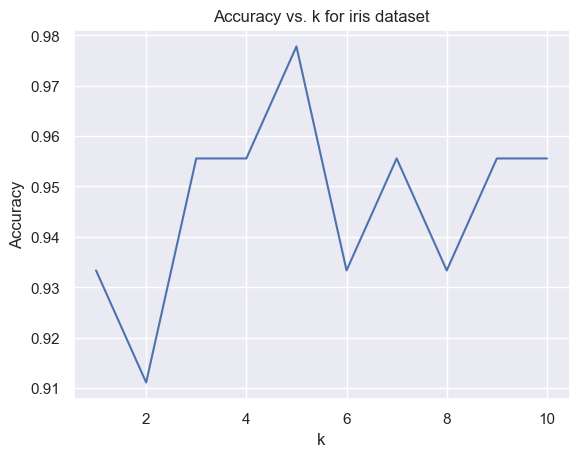

In [5]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, stratify=data.target, random_state=42 
                                        #TODO: enter the appropriate values to partition the data, 
                                        #and ensure your results are reproducible
                                        #and obtain stratified samples
                                        ) 

#build the k-nn model, experiment with different values of k and plot the results

k_values = range(1, 11)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

# Plot the accuracy scores for each value of k
plt.plot(k_values, scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for iris dataset')
plt.show()


## Question 2: Evaluate the Results
Display the classification report for the knn model thats based on your recommended value of k. Evaluate the report and explain the results. 

In [6]:
# Train the k-NN model with the recommended value of k
k_model = 5
knn_model = KNeighborsClassifier(n_neighbors=k_model)
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=data.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Evaluation of classification report
Looking at the report, we can see that the model achieved perfect precision and recall for the setosa class, which means that it correctly predicted all the samples belonging to this class. For the versicolor class, the model achieved a precision of 0.88, which means that it correctly predicted 88% of the positive samples for this class, and a recall of 1.00, which means that it correctly identified all the actual positive samples for this class. The F1-score for versicolor is 0.94, which is a good balance between precision and recall. For the virginica class, the model achieved perfect precision, but a recall of 0.87, which means that it missed some of the actual positive samples for this class. The F1-score for virginica is 0.93, which is still a good score.

Overall, the model has performed well, with high accuracy and good precision, recall, and F1-scores for all classes. The macro average and weighted average F1-scores are both 0.96, which indicates that the model is equally good at predicting all classes, and that it is not biased towards any particular class.The model has achieved an accuracy of 0.96, which means that it correctly predicted the class of 96% of the samples in the dataset.

## Pt 2

1. Research the difference between accuracy, precision, and recall. Explain when you would choose one metric over another and provide examples.

Accuracy is a metric that measures the percentage of correctly predicted values out of the total number of values.

Precision measures the percentage of correctly predicted values out of the total number of predicted positive values. This metric only provides partial information about the number of false negatives and instead evaluates the model's ability to predict positive cases accurately.

Recall measures the percentage of correctly predicted positive values out of the total number of positive values. Similar to precision, this metric does not provide complete information about the number of false negatives and instead evaluates the model's ability to predict all positive instances accurately.

Based on this analysis, accuracy is the preferred metric when the dataset is well-balanced, and the number of false positives and negatives is equal. In contrast, precision and recall metrics are useful when the dataset is imbalanced.

2. In the lecture we discussed one method to partition your dataset using a train-test split. Identify another approach that can be used to partition your dataset and explain how it works.

K-fold cross-validation is another technique that can be employed for dividing the dataset into sections. This method involves dividing the dataset into equal-sized sections, which can be advantageous when the dataset is small, and the model's performance varies significantly across different train-test splits.

During each iteration, one section is set aside as the validation set, and the model is trained on the remaining k-1 sections. This procedure is repeated k times, with each section serving as the validation set in turn.

After completion of the k iterations, the model's performance is averaged, resulting in a more dependable estimate of the model's performance compared to using a single train-test split.


